<h4>Question 1:</h4>

In [46]:
import yfinance as yf

tesla = yf.Ticker("TSLA")
tesla_data = tesla.history(period="max")

tesla_data.reset_index(inplace=True)

print(tesla_data.head())

                       Date      Open      High       Low     Close  \
0 2010-06-29 00:00:00-04:00  1.266667  1.666667  1.169333  1.592667   
1 2010-06-30 00:00:00-04:00  1.719333  2.028000  1.553333  1.588667   
2 2010-07-01 00:00:00-04:00  1.666667  1.728000  1.351333  1.464000   
3 2010-07-02 00:00:00-04:00  1.533333  1.540000  1.247333  1.280000   
4 2010-07-06 00:00:00-04:00  1.333333  1.333333  1.055333  1.074000   

      Volume  Dividends  Stock Splits  
0  281494500        0.0           0.0  
1  257806500        0.0           0.0  
2  123282000        0.0           0.0  
3   77097000        0.0           0.0  
4  103003500        0.0           0.0  




<h4>Question 2:</h4>

In [47]:
import requests
from bs4 import BeautifulSoup, Comment
import pandas as pd

url = "https://www.macrotrends.net/stocks/charts/tsla/tesla/revenue"
response = requests.get(url)
soup = BeautifulSoup(response.text, "html.parser")

comments = soup.find_all(string=lambda text: isinstance(text, Comment))

for comment in comments:
    if 'Tesla Quarterly Revenue' in comment:
        comment_soup = BeautifulSoup(comment, 'html.parser')
        table = comment_soup.find('table')
        if table:
            tesla_revenue = pd.read_html(str(table))[0]
            break

tesla_revenue.dropna(inplace=True)

print(tesla_revenue.tail())

2025-06-30    2.249600e+10
2025-03-31    1.933500e+10
2024-12-31    2.570700e+10
2024-09-30    2.518200e+10
2024-06-30    2.550000e+10
Name: Total Revenue, dtype: float64


<h4>Question 3:</h4>

In [44]:
import yfinance as yf

gme = yf.Ticker("GME")
gme_data = gme.history(period="max")

#Reset index to turn the Date index into a column
gme_data.reset_index(inplace=True)

print(gme_data.head())

                       Date      Open      High       Low     Close    Volume  \
0 2002-02-13 00:00:00-05:00  1.620128  1.693350  1.603296  1.691667  76216000   
1 2002-02-14 00:00:00-05:00  1.712707  1.716074  1.670626  1.683251  11021600   
2 2002-02-15 00:00:00-05:00  1.683250  1.687458  1.658002  1.674834   8389600   
3 2002-02-19 00:00:00-05:00  1.666418  1.666418  1.578047  1.607504   7410400   
4 2002-02-20 00:00:00-05:00  1.615921  1.662210  1.603296  1.662210   6892800   

   Dividends  Stock Splits  
0        0.0           0.0  
1        0.0           0.0  
2        0.0           0.0  
3        0.0           0.0  
4        0.0           0.0  


<h4>Question 4:</h4>

In [48]:
import requests
from bs4 import BeautifulSoup, Comment
import pandas as pd
from io import StringIO

url = "https://companiesmarketcap.com/gamestop/revenue/"
response = requests.get(url)
soup = BeautifulSoup(response.text, "html.parser")

tables = soup.find_all('table')

if len(tables) > 0:
    gme_revenue = pd.read_html(StringIO(str(tables[0])))[0]
    gme_revenue.dropna(inplace=True)
    print(gme_revenue.tail())
else:
    print("No tables found.")

    Year  Revenue  Change
19  2006  $5.31 B  72.03%
20  2005  $3.09 B  67.78%
21  2004  $1.84 B  16.72%
22  2003  $1.57 B  16.71%
23  2002  $1.35 B  20.66%


<h4>Question 5:</h4>

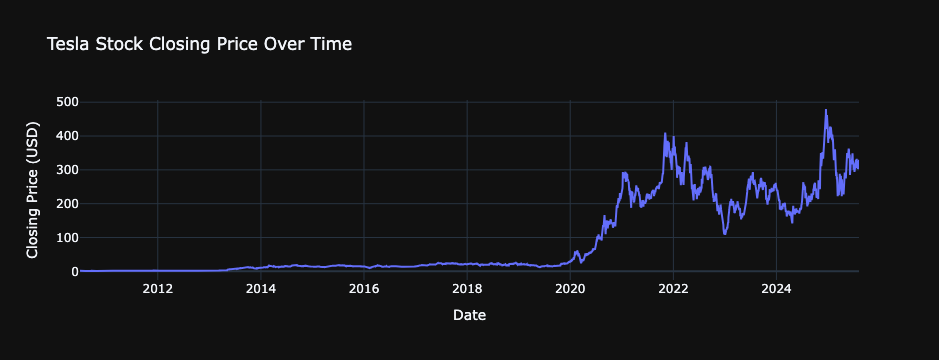

In [49]:
import yfinance as yf
import plotly.graph_objects as go

tesla = yf.Ticker("TSLA")
tesla_data = tesla.history(period="max")

tesla_data.reset_index(inplace=True)

def make_graph(stock_data, stock_name):
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=stock_data['Date'], y=stock_data['Close'], 
                             mode='lines', name=f'{stock_name} Close Price'))
    fig.update_layout(title=f"{stock_name} Stock Closing Price Over Time",
        xaxis_title="Date",
        yaxis_title="Closing Price (USD)",
        template="plotly_dark")
    fig.show()

make_graph(tesla_data, "Tesla")

<h4>Question 6:</h4>

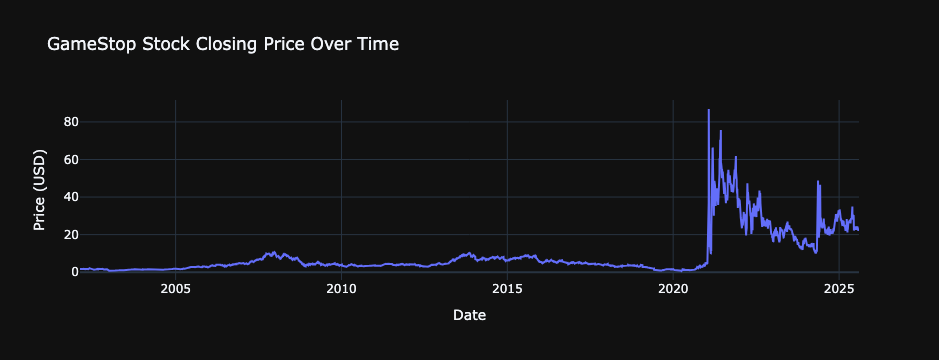

In [41]:
import yfinance as yf
import plotly.graph_objects as go

gme = yf.Ticker("GME")
gme_data = gme.history(period="max")
gme_data.reset_index(inplace=True)

def make_graph(stock_data, title):
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=stock_data['Date'], y=stock_data['Close'], name="Closing Price"))
    fig.update_layout(title=title, xaxis_title="Date", yaxis_title="Price (USD)", template='plotly_dark')
    fig.show()

make_graph(gme_data, "GameStop Stock Closing Price Over Time")